# Tutorial on estimating a simple bandpass filter using the modified Yule-Walker method in `yulewalker`

We begin by importing `yulewalker` as well as important functions:

In [6]:
import yulewalker as yw
import scipy.signal 
import numpy as np
import matplotlib.pyplot as plt

Let's start by defining an example impulse response. As an example we want to approximate a bandpass between 10KHz and 15KHz with a 48KHz sampling rate. We need to specify the points where the magnitudes are 0., the points where the mangitude is 1. as well as the edges
(the points where magnitude goes from 0 to 1 and vice versa). This list must be ordered!

Text(0.5, 1.0, 'Bandpass filter mangitude')

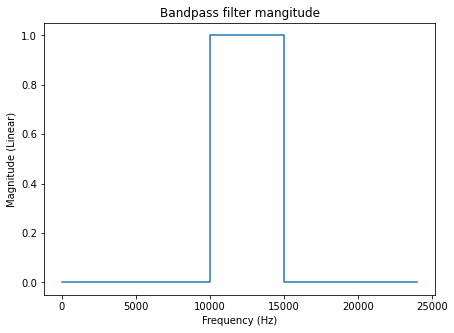

In [13]:
# Let's start by defining an example impulse response. 
# 
# E.g. if we want to approximate a bandpass between 10KHz and 15KHz with a 48KHz sampling rate, we
# need to specify the points where the magnitudes are 0., the points where the mangitude is 1. as well as the edges
# (the points where magnitude goes from 0 to 1 and vice versa.) This list must be ordered!

sample_rate = 48000.

freqs = np.array([
    0.0,               # Magnitude is 0 
    10_000.,           # Magnitude is 0
    10_000.,           # Magnitude becomes 1
    15_000.,           # Magnitude is 1
    15_000.,           # Magnitude becomes 0 
    24_000.,           # Magnitude stays 0 
])

magnitude = np.array([
    0.0,               # At 0Hz
    0.0,               # At 100Hz
    1.0,               # At 100Hz
    1.0,               # At 1000Hz
    0.0,               # At 1000Hz
    0.0,               # At 24000Hz (Nyquist)
])


fig, ax = plt.subplots(figsize=(7,5))
ax.plot(freqs, magnitude)
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('Magnitude (Linear)')
ax.set_title('Bandpass filter mangitude')

In [47]:

# First, we have to normalize frequency to [0., 1.]
normalized_freqs = freqs/sample_rate*2

# Assume IIR order filter 8
n_order = 8

# Run yulewalk
a, b = yw.yulewalk(n_order, normalized_freqs, magnitude)

The transfer functions is:
$$
H(z) = \frac{\sum_{n=0}^7 b[n]z^{-n}}{\sum_{n=0}^7 a[n]z^{-n}}
$$

where:

In [48]:
print("Denominator coefficients:")
for n in range(n_order):
    print(f"a[{n}] = {a[n]}")
print()
print("Numerator coefficients:")
for n in range(n_order):
    print(f"b[{n}] = {b[n]}")

Denominator coefficients:
a[0] = 1.0
a[1] = 0.4093934647473884
a[2] = 2.1810236017626488
a[3] = 0.7056198553397868
a[4] = 2.094509992919481
a[5] = 0.46739835113068695
a[6] = 0.9699365320465088
a[7] = 0.11623882341753203

Numerator coefficients:
b[0] = 0.031069013898329598
b[1] = 0.007680886146461386
b[2] = -0.02424079678927219
b[3] = -0.0002983577079390124
b[4] = 0.036556366252430306
b[5] = -0.00021611338263526704
b[6] = -0.024279696039518763
b[7] = 0.007882221443455203


We can now use `sos.signal.freqz` to plot the frequency response:

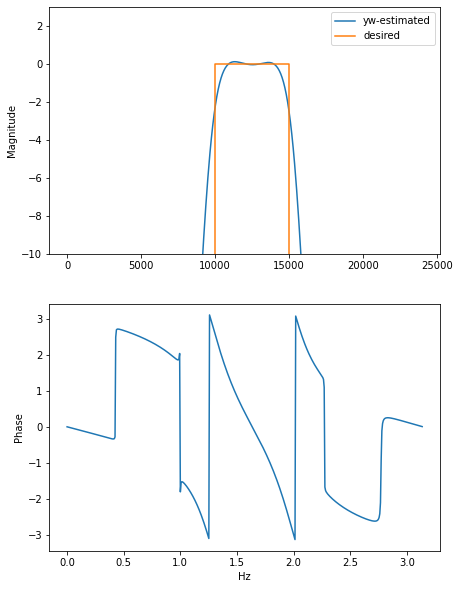

In [70]:
w, h = scipy.signal.freqz(b, a)

fig, ax = plt.subplots(2, figsize=(7, 10))
ax[0].set_ylabel('Magnitude')
ax[1].set_ylabel('Phase')
ax[1].set_xlabel('Hz')

ax[0].plot(w/np.pi*48_000/2, 20*np.log10(np.abs(h)))
ax[0].plot(freqs, 20*np.log10(magnitude + 0.0001))
ax[0].legend(['yw-estimated', 'desired'])

ax[0].set_ylim((-10,3))
ax[1].plot(w, np.angle(h))

We observe that the $-3dB$ points that define the bandwidth are around $10KHz$ and $15KHz$ respectively.